# BTC Prediction

In [8]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
from datetime import date
from pandas import json_normalize

%matplotlib inline

## Part 1 - Import Indicator data from Topfolio

In [9]:
# Define Variables

# Format current date as ISO format
#start_date = (pd.Timestamp.now() - pd.Timedelta(3, unit='d'))
#end_date = pd.Timestamp.now()

# Define Parameters
exchange = 'Binance'
symbol = 'BTCUSDT'
indicator_type = 'orderbook'
name = '0-1%'
interval = '3600'

# Create parameterized url
base_url = "https://api.topfol.io/indicators/candle?"
parameters_url = "startDate=2021-03-02&endDate=2021-04-02&exchange="+exchange+"&symbol="+symbol+"&indicator_type="+indicator_type+"&name="+name+"&interval="+interval
request_url = base_url + parameters_url


# Submit request and format output
response_data = requests.get(request_url)
pages = int(response_data.headers['page-amount'])

print (f'Number of Pages is {pages}')

new_results = True
page = 1
df_btcusdt_data = pd.DataFrame()

topfolio_api = requests.get(request_url).json()

data = topfolio_api

for page in range(2, pages+1):
    topfolio_api = requests.get(request_url + f"&page={page}").json()
    data.extend(topfolio_api)
    page += 1
    
df_btcusdt_data = json_normalize(data)


Number of Pages is 8


In [10]:
df_btcusdt_data.head()

,timestamp,open_price,high_price,low_price,close_price
0,1614643200,49624.685000,50186.360000,49361.681429,49374.098750
1,1614646800,49323.113333,49386.074286,48764.108571,49363.392857
2,1614650400,49393.442857,49747.785714,49135.692857,49200.982857
3,1614654000,49169.604286,49379.706250,48887.331429,49000.850000
4,1614657600,48970.001429,49183.478571,48687.527143,49104.762857


In [12]:
#df_btcusdt_dataeeded fields
#df_btcusdt_data = df_btcusdt_data.drop(['open_price','high_price','low_price'],axis=1)

# Convert Unix Time to iso format
df_btcusdt_data['timestamp']=(pd.to_datetime(df_btcusdt_data['timestamp'],unit='s')) 

# Set index to timestamp
df_btcusdt_data = df_btcusdt_data.set_index(['timestamp'])

# Sort Data
df_btcusdt_data = df_btcusdt_data.sort_index()

# Rename Column
df_btcusdt_data.columns = ['open','high','low','close']

df_btcusdt_data.columns = pd.MultiIndex.from_product([["BTCUSDT"], df_btcusdt_data.columns])

In [13]:
df_btcusdt_data.count()

BTCUSDT  open     759
         high     759
         low      759
         close    759
dtype: int64

## Part 2 - Forecasting

### Monte Carlo Simulation

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
#Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast
MC_week = MCSimulation(
    portfolio_data = df_btcusdt_data,
    num_simulation = num_sims,
    num_trading_days = 90
)

In [24]:
# Running a Monte Carlo simulation to forecast a week cumulative returns
MC_week.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996103,1.005173,1.000065,1.001519,1.000580,1.004648,1.000146,1.006408,1.006623,0.999260,...,0.986237,1.001623,1.004615,1.000914,0.998061,0.994418,0.994837,1.000339,0.998774,0.999366
2,0.988000,1.014883,0.996350,1.009329,0.998850,0.986902,1.005801,1.006771,0.992956,0.994476,...,0.999847,0.988044,0.993912,1.001595,0.993482,1.002553,0.993206,1.001508,1.003355,0.999783
3,0.997095,1.016163,0.990231,1.011868,0.998388,1.002383,1.016892,0.988138,1.002600,1.000391,...,1.000466,0.990218,0.999873,0.993998,1.002292,0.996805,1.003909,0.999441,0.999157,1.006383
4,0.996281,1.015761,0.985235,1.003597,0.990021,0.984933,1.016183,0.977489,0.992505,0.999906,...,0.994991,0.982196,1.007230,0.995288,0.994882,0.998306,0.999181,0.996886,0.996776,1.026299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1.014335,1.074983,1.040240,1.043834,0.973791,0.992140,1.058273,1.064829,1.042403,0.899494,...,1.023938,1.070429,1.095999,0.901248,0.985331,1.087652,1.106548,1.068184,1.022528,1.097500
87,1.029020,1.070434,1.026512,1.050216,0.981016,0.981652,1.059538,1.071553,1.036676,0.896827,...,1.011725,1.062508,1.084376,0.885155,0.993176,1.085856,1.109954,1.076063,1.019732,1.111536
88,1.012457,1.084451,1.023484,1.035667,0.968520,0.971708,1.068312,1.066498,1.045136,0.908732,...,1.024553,1.069766,1.083264,0.893523,1.005164,1.080584,1.108926,1.071293,1.026116,1.115964
89,0.993369,1.100152,1.030896,1.040378,0.983863,0.974314,1.079590,1.086577,1.042942,0.911157,...,1.035368,1.057240,1.065879,0.900720,1.008365,1.077788,1.106906,1.068129,1.024997,1.134710


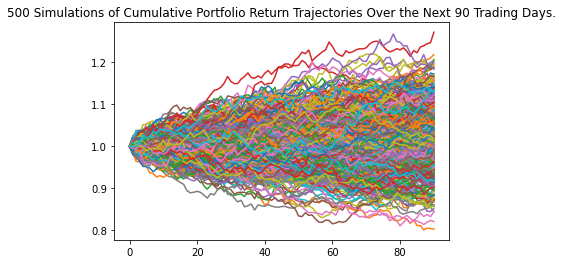

In [25]:
# Plot simulation outcomes
line_plot = MC_week.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_seven_day_sim_plot.png", bbox_inches="tight")

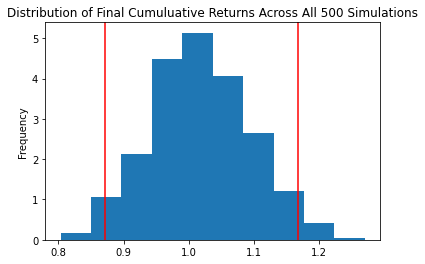

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_week.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_seven_day_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_week.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.018167
std               0.076464
min               0.803185
25%               0.967773
50%               1.015033
75%               1.069848
max               1.270348
95% CI Lower      0.872120
95% CI Upper      1.167619
Name: 90, dtype: float64


### Calculate the expected Bitcoin range.

In [29]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*btc_price,2)
ci_upper = round(tbl[9]*btc_price,2)
diff_lower = round(btc_price - ci_lower,2)
diff_upper = round(ci_upper - btc_price,2)

# Print results
print(f"Bitcoin current price is ${btc_price}")
print(f"There is a 95% chance that it will be within the following range ${ci_lower} and ${ci_upper} over the next 90 days")
print(f"Distance from upper is ${diff_upper}")
print(f"Distance from lower is ${diff_lower}")
      

Bitcoin current price is $59245.0
There is a 95% chance that it will be within the following range $51668.78 and $69175.61 over the next 90 days
Distance from upper is $9930.61
Distance from lower is $7576.22
